# Интеграция данных

# Из методички

**Методические указания**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data1 = pd.read_csv('issues1.csv', index_col=0)
data1.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


Мы имеем данные об обращениях клиентов онлайн-магазина в службу технической поддержки. Датасет состоит из 11 колонок:

1. Идентификатор обращения - это уникальная строка, по видимому, генерируемая случайно по алгоритму типа UUID.
2. Канал, по которому обращение поступило в систему. Здесь приводится название канала в текстовом виде.
3. Категория обращения - также дискретная переменная, один вариант из определенного набора.
4. Подкатегория обращения.
5. К обращению пользователи могут прилагать комментарии. В данном поле собраны эти комментарии в простом текстовом, необработанном виде.
6. Идентификатор заказа, по которому сделано обращение. Некоторые значения здесь отсутствуют, то есть обращение может быть связано с заказом, а может и нет.
7. Дата поступления обращения в систему. Здесь фиксируется дата и точное время.
8. Дата ответа на обращение сотрудника техподдержки. Также дата со временем.
9. Дата прохождения клиентом опроса об удовлетворенности работой технической поддержки.
10. Имя сотрудника, который работал с этим обращением.
11. Оценка, которую клиент поставил работе технической поддержки. Именно это и является целевой переменной в данном датасете.

В этой таблице приведены данные свыше 28 тысячах обращений.

In [22]:
data2 = pd.read_csv('issues2.csv', index_col=0)
data2

,Id,channel_name,category,Sub-category,Order_id,Reported at,Responded at,Survey responded at,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,"28 08 2023, 11:38:00 PM","29 08 2023, 05:55:00 AM",29 08 2023,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,"30 08 2023, 11:03:00 AM","30 08 2023, 11:04:00 AM",30 08 2023,L. Beck,5
...,...,...,...,...,...,...,...,...,...,...
44334,0e5c4973-24bc-4d7d-9eb4-54c868721109,Inbound,Product Queries,Product Specific Information,74ca7f8d-9c52-4902-b981-6fb6a5932c72,"08 08 2023, 12:13:00 PM","08 08 2023, 06:44:00 PM",08 08 2023,J. Kelly,5
44335,2fb101c6-3f7d-46ea-a0cb-c6a7b085d1d1,Inbound,Shopzilla Related,General Enquiry,7cc638a3-6273-4e2a-86ea-60436df6c0b9,"22 08 2023, 07:37:00 PM","22 08 2023, 08:21:00 PM",22 08 2023,S. Nelson,5
44336,cbb0d288-a7d7-40b8-a52a-2896ba4d7ce2,Inbound,Returns,Return request,af616b51-6739-48cd-a8f5-4f04b5eb8f79,"08 12 2023, 04:39:00 PM","12 08 2023, 04:43:00 PM",12 08 2023,D. Terry,5
44337,8de9d211-cf76-4447-962c-0517b922b548,Inbound,Returns,Service Centres Related,95de5b8a-145e-4282-a631-ddec3017d912,"27 08 2023, 08:19:00 AM","27 08 2023, 08:21:00 AM",27 08 2023,G. Jones,5


В этом файле описаны еще почти 45 тысяч обращений.

Из явно бросающихся в глаза отличий, мы видим отсутствие во втором файле информации о тексте комментария.

Еще заметим, что некоторые колонки во втором файле называются немного по-другому.

In [23]:
data3 = pd.read_csv('issues4.csv', index_col=0)
data3.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,"August 27, 2023, 08:28:00 AM","August 27, 2023, 08:29:00 AM","August 27, 2023, 12:00:00 AM",Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,"December 08, 2023, 03:04:00 PM","August 12, 2023, 03:19:00 PM","August 12, 2023, 12:00:00 AM",Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,"August 13, 2023, 12:45:00 PM","August 13, 2023, 01:02:00 PM","August 13, 2023, 12:00:00 AM",Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,"June 08, 2023, 06:07:00 PM","August 06, 2023, 06:08:00 PM","August 06, 2023, 12:00:00 AM",Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,"April 08, 2023, 10:05:00 PM","August 04, 2023, 10:08:00 PM","August 04, 2023, 12:00:00 AM",Kristin Adams,5


Здесь содержится меньше всего - 13 тысяч обращений. И меньше всего колонок - мы не видим ни текста обращения, ни связанного идентификатора заказа.

In [24]:
data1.shape, data2.shape, data3.shape

((28425, 11), (44339, 10), (13143, 9))

**Вертикальная интеграция данных**

Но если мы проведем конкатенацию сразу, вот так, мы получим не тот результат, который нужно.

In [25]:
pd.concat([data1, data2]).head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,channel_name,Reported at,Responded at,Survey responded at
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,NaN,NaN,NaN,NaN
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


Здесь мы видим, что из-за разности наименования столбцов у нас получилось дублирование: столбцы из второй таблицы не стали продолжением столбцов из первой, а просто добавились в качестве новых. При этом по строкам из первой таблицы в этих столбцах автоматически проставлены пропуски. Такую ситуацию можно сразу отследить по количеству столбцов в итоговом датафрейме. Их должно было быть 11, а стало 1 - явно что-то пошло не так.

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.6+ MB


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   44339 non-null  object
 1   channel_name         44339 non-null  object
 2   category             44339 non-null  object
 3   Sub-category         44339 non-null  object
 4   Order_id             44272 non-null  object
 5   Reported at          44339 non-null  object
 6   Responded at         44339 non-null  object
 7   Survey responded at  44339 non-null  object
 8   Agent_name           44339 non-null  object
 9   CSAT Score           44339 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


Отсюда можно построить схему переименования колонок так, чтобы в обеих таблицах одинаковые по смыслу колонки назывались в точности идентично.

In [28]:
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

Еще важно следить за тем, чтобы в обеих таблицах были абсолютно одинаковые форматы. Лучший способ этого добиться - перевести все даты во внутренний формат pandas - datetime.

In [29]:
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')

<ipython-input-29-a5e2289ea512>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
<ipython-input-29-a5e2289ea512>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    44339 non-null  object        
 1   Channel               44339 non-null  object        
 2   category              44339 non-null  object        
 3   Sub-category          44339 non-null  object        
 4   Order_id              44272 non-null  object        
 5   Issue_reported_Date   44339 non-null  datetime64[ns]
 6   Issue_responded_Date  44339 non-null  datetime64[ns]
 7   Survey_response_Date  44339 non-null  datetime64[ns]
 8   Agent_name            44339 non-null  object        
 9   CSAT Score            44339 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 4.7+ MB


In [31]:
data2.head()

,Id,Channel,category,Sub-category,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,2023-08-21 21:01:00,2023-08-21 21:04:00,2023-08-21,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,2023-08-18 21:20:00,2023-08-18 21:20:00,2023-08-18,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,2023-08-24 21:57:00,2023-08-24 21:58:00,2023-08-24,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,2023-08-28 23:38:00,2023-08-29 05:55:00,2023-08-29,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,2023-08-30 11:03:00,2023-08-30 11:04:00,2023-08-30,L. Beck,5


В первой таблице также надо преобразовать даты в нужный формат.

In [32]:
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], format='mixed')
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], format='mixed')
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    28425 non-null  object        
 1   Channel               28425 non-null  object        
 2   category              28425 non-null  object        
 3   Sub-category          28425 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              22389 non-null  object        
 6   Issue_reported_Date   28425 non-null  datetime64[ns]
 7   Issue_responded_Date  28425 non-null  datetime64[ns]
 8   Survey_response_Date  28425 non-null  datetime64[ns]
 9   Agent_name            28425 non-null  object        
 10  CSAT Score            28425 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 3.6+ MB


Вот теперь можно провести собственно объединение данных.

In [34]:
data_12 = pd.concat([data1, data2])
data_12.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


Отдельно проверим, что не появилось никаких лишних колонок.

In [35]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72764 entries, 0 to 44338
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    72764 non-null  object        
 1   Channel               72764 non-null  object        
 2   category              72764 non-null  object        
 3   Sub-category          72764 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   72764 non-null  datetime64[ns]
 7   Issue_responded_Date  72764 non-null  datetime64[ns]
 8   Survey_response_Date  72764 non-null  datetime64[ns]
 9   Agent_name            72764 non-null  object        
 10  CSAT Score            72764 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 6.7+ MB


In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             13143 non-null  object
 1   channel_name          13143 non-null  object
 2   category              13143 non-null  object
 3   Sub-category          13143 non-null  object
 4   Issue_reported at     13143 non-null  object
 5   issue_responded       13143 non-null  object
 6   Survey_response_Date  13143 non-null  object
 7   Agent                 13143 non-null  object
 8   CSAT Score            13143 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


Также, как и на предыдущем шаге, колонки требуют переименования.

In [37]:
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})

И также парсим все даты.

In [38]:
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])

<ipython-input-38-a84f6c2ad651>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [39]:
data3.head()

,Id,Channel,category,Sub-category,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 08:28:00,2023-08-27 08:29:00,2023-08-27,Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,2023-12-08 15:04:00,2023-08-12 15:19:00,2023-08-12,Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-13 12:45:00,2023-08-13 13:02:00,2023-08-13,Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,2023-06-08 18:07:00,2023-08-06 18:08:00,2023-08-06,Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,2023-04-08 22:05:00,2023-08-04 22:08:00,2023-08-04,Kristin Adams,5


In [40]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    13143 non-null  object        
 1   Channel               13143 non-null  object        
 2   category              13143 non-null  object        
 3   Sub-category          13143 non-null  object        
 4   Issue_reported_Date   13143 non-null  datetime64[ns]
 5   Issue_responded_Date  13143 non-null  datetime64[ns]
 6   Survey_response_Date  13143 non-null  datetime64[ns]
 7   Agent_name            13143 non-null  object        
 8   CSAT Score            13143 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 1.5+ MB


Можно проводить объединение.

In [41]:
data_123 = pd.concat([data_12, data3])
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


In [42]:
data_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 0 to 13142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 7.9+ MB


In [43]:
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


В первых двух таблицах у нас имя оператора обозначено инициалом, а в третьей - полным именем. Необходимо привести все данные к единому соглашению. Здесь нужно приводить к форме с инициалом, потому что полное имя мы можем сократить до инициала, а только по инициалу восстановить полное имя нельзя.

In [44]:
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [45]:
data_123 = pd.concat([data_12, data3])

**Добавление данных заказа**

Итак, у нас собраны в одной таблице данные по всем имеющимся обращениям клиентов в техподдержку. Мы могли заметить, что среди полей в этой таблице есть идентификатор заказа. Информация по заказам хранится в отдельной таблице.

In [47]:
orders_data = pd.read_csv('orders.csv', index_col=0)
orders_data.head()

,Id,order_date_time,Customer_City,Product_category,Item_price
0,53465d50-a568-48a9-b96e-ee2a0524fee8,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,30/07/2023 21:43,HAJIPUR,Home,445.0
2,55d4e1bb-e148-437f-aa83-3bfbae939155,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0
3,509803e9-4c15-4db4-bbe7-fc1e12b6c6cc,08/08/2023 16:40,JASPUR,Mobile,32999.0
4,5cfbe41f-ffcc-4fcf-8520-94bb61dee14e,07/08/2023 08:29,JHAJJAR,Electronics,1499.0


Первый же столбец - это идентификатор заказа, который должен совпадать с идентификатором с общей таблице. Для проведение соединения таблиц в pandas необязательно, но очень облегчает процедуру, если соответствующие столбцы таблиц назывались одинаково. Поэтому переименуем столбец в данной таблице так, чтобы он назывался как в основной.

In [48]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})

Теперь можно провести соединение. Для этого выделим ключевой столбец - тот, по которому будет проводиться сопоставление записей. Самое важное - выбрать тип соединения. В данном случае, нам нужно выбрать все записи из первой (левой) таблицы и присоединить к ним соответствующие столбцы из второй (правой) таблицы. Значит, нужно использовать левое внешнее соединение.

In [49]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


In [50]:
orders_data[orders_data.Order_id == 'a5464619-b2d8-49de-9346-5e5db0972756']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


Оценить масштаб пропусков в данных можно с помощью визуализации отсутствующих значений.

<Axes: >

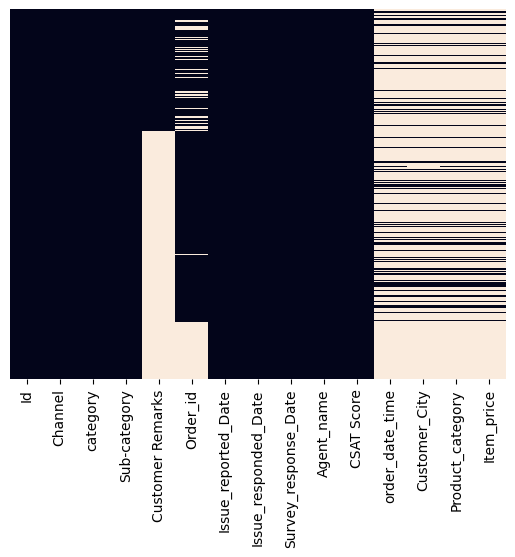

In [51]:
sns.heatmap(data_with_orders.isnull(), yticklabels=False, cbar=False)

**Добавление данных менеджеров**

Перейдем к последней таблице нашего набора - данным об операторах технической поддержки.

In [53]:
agent_data = pd.read_csv("agents.csv", index_col=0)
agent_data.head()

,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening
1,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning
2,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning
3,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
4,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning


В этой таблице собрана информация о более чем 1300 работниках технической поддержки, которые обрабатывают обращения клиентов. У каждого оператора есть руководитель и менеджер, а также тип контракта и вид смены. В нашей основной таблице есть поле с именем оператора. Похоже, что именно по нему и надо будет проводить соединение. Но для начала нужно убедиться, что в этой новой таблице имя оператора уникальное. Для этого проведем группировку по имени оператора и выведем количество значений по остальным столбцам.

In [54]:
agent_data.groupby(['Agent']).agg('count').head(20)

,Supervisor,Manager,Tenure Bucket,Shift
Agent,,,,
Aaron Edwards,1,1,1,1
Aaron Romero,1,1,1,1
Abigail Gonzalez,1,1,1,1
Adam Barnett,1,1,1,1
Adam Hammond,1,1,1,1
Adam Henderson,1,1,1,1
Adam Hernandez,1,1,1,1
Adam Schwartz,1,1,1,1
Adam Torres,1,1,1,1


Видно, что каждому имени оператора соответствует только одно значение по всем другим столбцам.

Однако, в нашей основной таблице операторы названы через инициалы. Давайте в этой таблице также приведем имя оператора к нужной форме.

In [55]:
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [56]:
agent_data.groupby(['Agent_name']).agg('first').head(20)

,Agent,Supervisor,Manager,Tenure Bucket,Shift
Agent_name,,,,,
A. Adams,Adriana Adams,Sophia Sato,John Smith,0-30,Morning
A. Aguilar,Andrew Aguilar,Nathan Patel,Emily Chen,On Job Training,Evening
A. Barnett,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
A. Barrett,Andrew Barrett,Elijah Yamaguchi,John Smith,>90,Evening
A. Barron,Alexandra Barron,Austin Johnson,Jennifer Nguyen,On Job Training,Evening
A. Beck,Andrea Beck,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening
A. Bell,Amy Bell,Wyatt Kim,Jennifer Nguyen,On Job Training,Evening
A. Benjamin,Amanda Benjamin,Amelia Tanaka,Emily Chen,>90,Morning
A. Berry,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening


In [57]:
data_123.groupby(['Agent_name']).agg('count').head(20)

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,CSAT Score
Agent_name,,,,,,,,,,
A. Adams,215,215,215,215,70,175,215,215,215,215
A. Aguilar,31,31,31,31,11,19,31,31,31,31
A. Barnett,56,56,56,56,22,41,56,56,56,56
A. Barrett,50,50,50,50,16,35,50,50,50,50
A. Barron,25,25,25,25,9,18,25,25,25,25
A. Beck,70,70,70,70,17,51,70,70,70,70
A. Bell,20,20,20,20,10,18,20,20,20,20
A. Benjamin,64,64,64,64,22,48,64,64,64,64
A. Berry,135,135,135,135,62,89,135,135,135,135


In [58]:
data_with_agents = data_with_orders.join(agent_data, rsuffix='_1', how='left')
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,...,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name_1
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,...,NaN,NaN,NaN,NaN,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening,A. Edwards
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,...,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,A. Romero
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,...,NaN,NaN,NaN,NaN,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning,A. Gonzalez
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,...,NaN,NaN,NaN,NaN,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,A. Barnett
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,...,NaN,NaN,NaN,NaN,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning,A. Hammond


<Axes: >

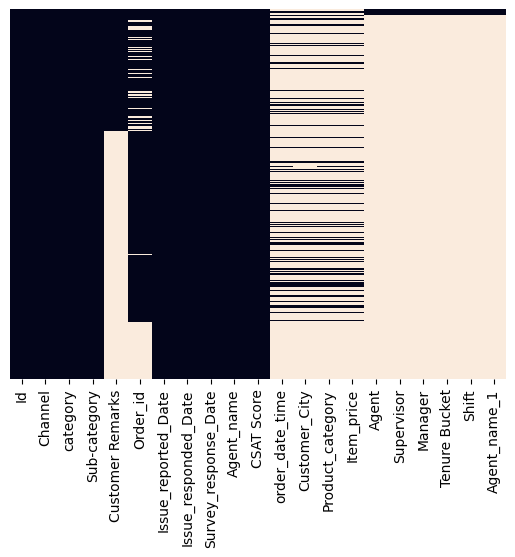

In [59]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

Дело в том, что функция join по умолчанию проводит соединение по индексу двух датафреймов в качестве ключа. То есть в нашем случае, по номеру строки. Нам же нужно указать название определенного столбца. Для такого режима соединения больше подходит функция merge.

In [60]:
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name', copy=False)
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN,James Blackwell,Jackson Park,William Kim,On Job Training,Evening
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Mark Wilson,Scarlett Chen,John Smith,0-30,Morning
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN,Anthony Smith,Mia Patel,John Smith,>90,Morning
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN,Sarah Taylor,Carter Park,Jennifer Nguyen,On Job Training,Morning


<Axes: >

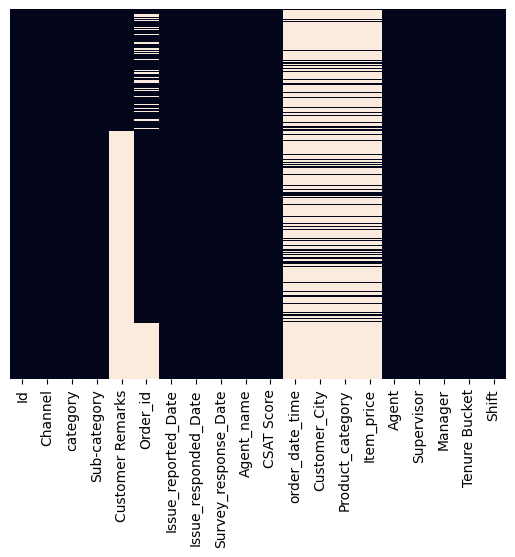

In [61]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

In [62]:
agent_data.Agent_name.value_counts()

,count
Agent_name,
J. Moore,6
M. Smith,4
A. Brown,4
J. Williams,4
K. Martin,4
...,...
A. Sweeney,1
A. Thornton,1
A. Marshall,1


Одному и тому же инициалу может соответствовать несколько разных полных имен.

In [63]:
agent_data[agent_data.Agent_name == 'J. Moore']

,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name
468,Jacob Moore,Ava Wong,Jennifer Nguyen,On Job Training,Morning,J. Moore
529,Jenna Moore,Aiden Patel,John Smith,>90,Morning,J. Moore
542,Jennifer Moore,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,J. Moore
612,Jon Moore,Ava Wong,William Kim,On Job Training,Evening,J. Moore
617,Jonathan Moore,Zoe Yamamoto,John Smith,>90,Morning,J. Moore
654,Juan Moore,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,J. Moore


Давайте посмотрим, какое количество записей в правой таблице соответствует каждой строке в левой. Для этого соединим левую таблицу со сверткой правой таблицы по именам.

In [64]:
data_with_agent_numbers = data_with_orders.merge(agent_data.Agent_name.value_counts(), how='left', left_on='Agent_name', right_index=True)

И выведем в этой таблице статистику по распределению количества строк.

In [69]:
data_with_agent_numbers.Agent_name.value_counts()

,count
Agent_name,
D. Smith,473
W. Taylor,429
J. Williams,427
J. Smith,309
M. Castillo,301
...,...
W. Mueller,20
T. Lopez,20
R. Gordon,20


# Задания для самостоятельного выполнения

*1. При выполнении вертикального объединения убедитесь в отсутствии дубликатов данных.*

In [71]:
duplicate_rows = data_123[data_123.duplicated()]
print(f"Количество дубликатов: {duplicate_rows.shape[0]}")

Количество дубликатов: 0


*2. При горизонтальной интеграции первой и второй таблицы выведите по каждому столбцу гистограмму распределения или плотность распределения, чтобы убедиться, что признаки выражаются по соотносимым шкалам.*

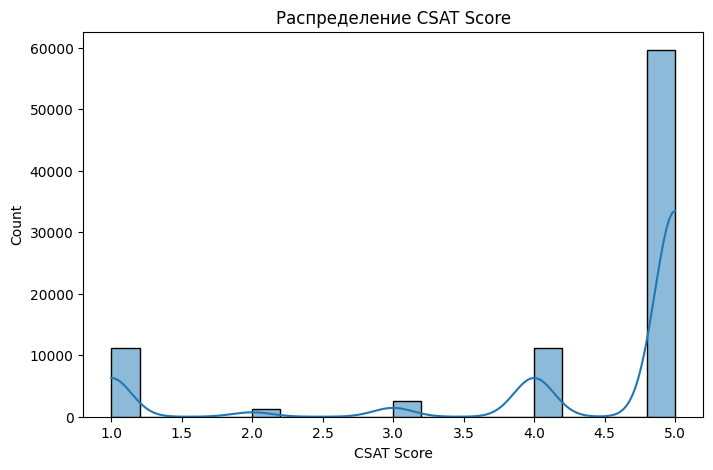

In [73]:
for col in ['CSAT Score']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_123[col], bins=20, kde=True) # построение гистограм
    # bins=20 - кол-во интервалов, на которые будет разбит диапазон
    # kde=True - включает линии оценки плотности распределения
    plt.title(f'Распределение {col}')
    plt.show()

*3. При выполнении третьего задания убедитесь более явно, что обильное количество пропущенных значений не является ошибкой объединения. Проведите больше, чем одну точечную проверку.*

Проверка нулевых значений

In [87]:
missing_values = data_with_orders.isnull().sum()
print(missing_values[missing_values > 0])

Customer Remarks    57482
Order_id            19246
order_date_time     68956
Customer_City       69090
Product_category    68974
Item_price          68964
dtype: int64


Сравнение кол-ва строк до и после объединения

In [76]:
print(len(data_123))
print(len(data_with_orders))

85907
85907


Проверка строк, в которых нет данных после объединения

In [81]:
missing_orders = data_with_orders[data_with_orders['order_date_time'].isnull()]
print("Пропущенные заказы:", len(missing_orders))
print("Пример таких строк:")
print(missing_orders[['Order_id', 'order_date_time']].head())


Пропущенные заказы: 68956
Пример таких строк:
                               Order_id order_date_time
0                                   NaN             NaN
2  15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6             NaN
3                                   NaN             NaN
4                                   NaN             NaN
6  e4e66d36-19af-4193-aaf9-c089792009a3             NaN


Есть заказы, которые не сопоставились (есть id и NaN), просто NaN - вовсе отсутствует, например, клиенты без покупок

In [85]:
# Те строки, где Order_id есть, но после объединения остался NaN
unmatched_orders = data_with_orders[data_with_orders['Order_id'].notnull() & data_with_orders['order_date_time'].isnull()]
print(f"Таких строк: {len(unmatched_orders)}")


Таких строк: 49710


In [86]:
order_id_sample = '15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6' # проверим вручную заказ
print(order_id_sample in orders_data['Order_id'].values)


False


Такого заказа нет, значит всё отработало корректно

*4. При выполнении третьего задания попробуйте использовать разные виды соединений. Как это отражается на структуре датасета?*

inner - только совпадающие Order_id

left_join - все из data_123 + данные из orders_data, если найдены

right_join - все из orders_data + data_123, если есть совпадения

outer - все из обеих таблиц

In [88]:
for how in ['inner', 'outer', 'left', 'right']:
    merged_data = data_123.merge(orders_data, on='Order_id', how=how)
    print(f"{how} join: {merged_data.shape}")

inner join: (16951, 15)
outer join: (155026, 15)
left join: (85907, 15)
right join: (86070, 15)


inner - только 16 951 строк имеют Order_id, который есть также в data_123

left join - в data_123 - 85907 строк, все строки остались

right join - 86070 строк, все заказы остались, данные из data_123 добавлены по совпадающему Order_id

outer - объединение всех уникальных Order_id

*5. Изучите документацию pandas в части описания методов merge и join.*

Метод merge в pandas позволяет объединять таблицы по конкретному столбцу — например, по номеру заказа. При этом ты сам выбираешь, какие строки оставить: только те, что есть в обеих таблицах, или все из одной таблицы с добавлением данных из другой, если совпадения найдутся, или все строки из обеих таблиц с пропусками там, где данных нет. Это очень гибкий способ объединения, похожий на SQL-операцию JOIN.

Метод join проще: он обычно соединяет таблицы по индексам — то есть по строкам, которые уже соответствуют друг другу. Его удобно использовать, когда данные уже структурированы и нужно быстро «присоединить» одну таблицу к другой, не указывая явно ключи и не настраивая сложные варианты соединения.

*6. Познакомьтесь с форматом представления дат strftime.*

Формат strftime — это способ представить дату и время в виде строки по заданному шаблону.

Идея в том, что ты задаёшь строку формата, в которой специальные символы начинаются с % и обозначают разные части даты или времени. Например:

%Y — год в четырёхзначном формате (например, 2025)

%m — месяц с ведущим нулём (01–12)

%d — день месяца с ведущим нулём (01–31)

%H — часы в 24-часовом формате (00–23)


In [89]:
data_with_orders.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN
